In [1]:
#import os
#import zipfile
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

In [7]:
# Load the CSV file
file_path = 'letters_mnist.csv'
df = pd.read_csv(file_path, header=None)

In [18]:
print(df.tail())

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
372446     Z       0       0       0       0       0       0       0       0   
372447     Z       0       0       0       0       0       0       0       0   
372448     Z       0       0       0       0       0       0       0       0   
372449     Z       0       0       0       0       0       0       0       0   
372450     Z       0       0       0       0       0       0       0       0   

        pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
372446       0  ...         0         0         0         0         0   
372447       0  ...         0         0         0         0         0   
372448       0  ...         0         0         0         0         0   
372449       0  ...         0         0         0         0         0   
372450       0  ...         0         0         0         0         0   

        pixel780  pixel781  pixel782  pixel783  pixel784  
372446         0     

In [10]:
# Assign proper column names dynamically
num_columns = df.shape[1]
df.columns = ['label'] + [f'pixel{i}' for i in range(1, num_columns)]

In [27]:
num_rows = df.shape[0]
#print(num_rows)
first_row_data = df.iloc[0:1,0:10]
print(first_row_data)

  label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     A       0       0       0       0       0       0       0       0   

   pixel9  
0       0  


In [11]:
# Convert numerical labels in the first column to alphabetic representation
df['label'] = df['label'].apply(lambda x: chr(int(x) + 65))

In [12]:
# Separate features and labels
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [42]:
print(X[25])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [43]:

def one_hot_encode(labels, num_classes):
    one_hot = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        one_hot[i, ord(label) - 65] = 1
    return one_hot

In [44]:
num_classes = 26
Y = one_hot_encode(y, num_classes)

In [45]:

# Normalize the feature data
X = X / 255.0

In [46]:
# Shuffle the data
X, Y = shuffle(X, Y, random_state=0)

In [47]:
# Split the data into training and test sets
split_idx = int(0.8 * X.shape[1])
X_train, X_test = X[:, :split_idx], X[:, split_idx:]
Y_train, Y_test = Y[:, :split_idx], Y[:, split_idx:]

In [48]:
#Function to display images and predictions
def display_images_with_predictions(X, Y, predictions, num_images=6):
    indices = np.random.choice(X.shape[1], num_images, replace=False)
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i, idx in enumerate(indices):
        axes[i].imshow(X[:, idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Prediction: {predictions[idx]} / Label: {np.argmax(Y[:, idx])}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

In [49]:
#Function to plot val_loss and val_acc
def plot_training_curves(train_losses, val_losses, val_accuracies):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [72]:
#A simple framework like TensorFlow

class DenseLayer:
    def __init__(self, input_size, output_size, activation=None):
        self.W = np.random.randn(output_size, input_size) * 0.01
        self.b = np.zeros((output_size, 1))
        self.activation = activation

    def forward(self, X):
        self.Z = np.dot(self.W, X) + self.b
        if self.activation == 'relu':
            self.A = np.maximum(0, self.Z)
        elif self.activation == 'softmax':
            expZ = np.exp(self.Z - np.max(self.Z, axis=0, keepdims=True))
            self.A = expZ / np.sum(expZ, axis=0, keepdims=True)
        else:
            self.A = self.Z
        return self.A

    def backward(self, dA):
        m = dA.shape[1]
        if self.activation == 'relu':
            dZ = dA * (self.Z > 0)
        elif self.activation == 'softmax':
            dZ = dA  # assuming dA is the gradient of loss wrt softmax output
        else:
            dZ = dA
        self.dW = (1 / m) * np.dot(dZ, self.A_prev.T)
        self.db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)
        return dA_prev

    def update_params(self, learning_rate):
        self.W -= learning_rate * self.dW
        self.b -= learning_rate * self.db

class SimpleNN:
    def __init__(self):
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)

    def compile(self, optimizer, loss, metrics):
        self.optimizer = optimizer
        self.loss = loss
        self.metrics = metrics

    def forward_prop(self, X):
        A = X
        for layer in self.layers:
            layer.A_prev = A
            A = layer.forward(A)
        return A

    def compute_loss(self, AL, Y):
        m = Y.shape[1]
        if self.loss == 'categorical_crossentropy':
            loss = -np.sum(Y * np.log(AL)) / m
        return loss

    def backward_prop(self, AL, Y):
        dA = AL - Y
        for layer in reversed(self.layers):
            dA = layer.backward(dA)

    def update_params(self, learning_rate):
        for layer in self.layers:
            layer.update_params(learning_rate)

    def fit(self, X, Y, epochs, batch_size, validation_split=0, shuffle_data=True):
        if shuffle_data:
            #X, Y = shuffle(X.T, Y.T)
            X, Y = X.T, Y.T

        train_losses = []
        val_losses = []
        val_accuracies = []

        if validation_split > 0:
            split_idx = int(X.shape[1] * (1 - validation_split))
            X_train, X_val = X[:, :split_idx], X[:, split_idx:]
            Y_train, Y_val = Y[:, :split_idx], Y[:, split_idx:]
        else:
            X_train, Y_train = X, Y

        for epoch in range(epochs):
            for i in range(0, X_train.shape[1], batch_size):
                X_batch = X_train[:, i:i+batch_size]
                Y_batch = Y_train[:, i:i+batch_size]
                AL = self.forward_prop(X_batch)
                self.backward_prop(AL, Y_batch)
                self.update_params(learning_rate=0.01)

            if validation_split > 0:
                val_AL = self.forward_prop(X_val)
                val_loss = self.compute_loss(val_AL, Y_val)
                val_acc = self.evaluate(X_val, Y_val)[1]
                print(f"Epoch {epoch+1}/{epochs} - val_loss: {val_loss:.4f} - val_acc: {val_acc*100:.2f}%")
                
                train_AL = self.forward_prop(X_train)
                train_loss = self.compute_loss(train_AL, Y_train)
                train_acc = self.evaluate(X_train, Y_train)[1]

                train_losses.append(train_loss)
                val_losses.append(val_loss)
                val_accuracies.append(val_acc)

            else:
                train_AL = self.forward_prop(X_train)
                train_loss = self.compute_loss(train_AL, Y_train)
                train_acc = self.evaluate(X_train, Y_train)[1]
                print(f"Epoch {epoch+1}/{epochs} - train_loss: {train_loss:.4f} - train_acc: {train_acc*100:.2f}%")
                
                train_losses.append(train_loss)

        return train_losses, val_losses, val_accuracies

    def evaluate(self, X, Y):
        AL = self.forward_prop(X)
        loss = self.compute_loss(AL, Y)
        predictions = np.argmax(AL, axis=0)
        labels = np.argmax(Y, axis=0)
        accuracy = np.mean(predictions == labels)
        return loss, accuracy

    def predict(self, X):
        AL = self.forward_prop(X)
        predictions = np.argmax(AL, axis=0)
        return predictions

In [73]:
#Creating the model
nn = SimpleNN()
nn.add(DenseLayer(627, 128, activation='relu'))
nn.add(DenseLayer(128, 64, activation='relu'))
nn.add(DenseLayer(64, 26, activation='softmax'))

In [74]:
#Compliling the model
nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
#fitting the model
train_losses, val_losses, val_accuracies = nn.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.2, shuffle_data=True)

test_loss, test_acc = nn.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')

Epoch 1/50 - val_loss: 2.9401 - val_acc: 15.37%
Epoch 2/50 - val_loss: 2.9308 - val_acc: 15.37%
Epoch 3/50 - val_loss: 2.9289 - val_acc: 15.37%


KeyboardInterrupt: 

In [57]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)

Shape of X_train: (372451, 627)
Shape of Y_train: (372451, 26)


In [16]:
predictions = nn.predict(X_test)

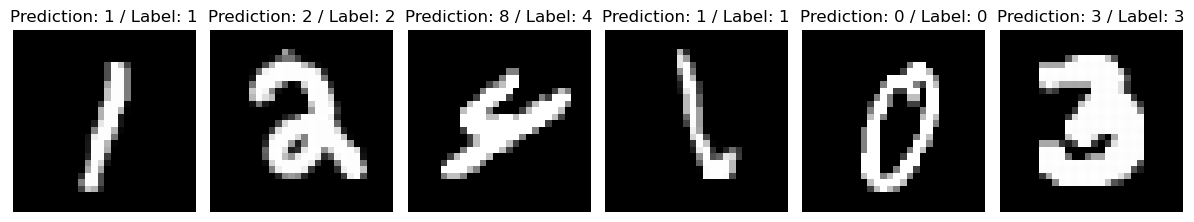

In [17]:
#Displaying random images with their predictions
display_images_with_predictions(X_test, Y_test, predictions)

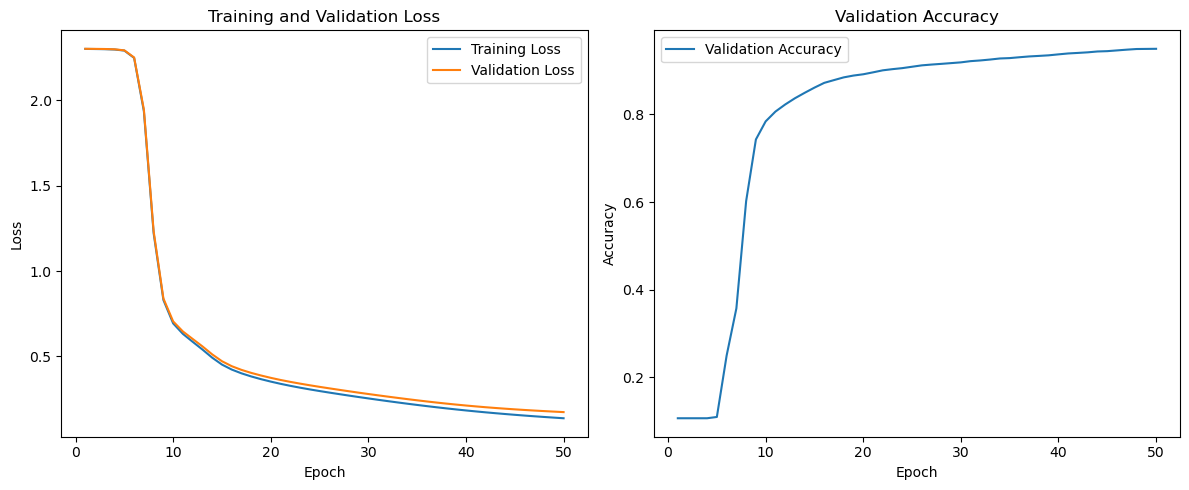

In [18]:
#Ploting the train curves
plot_training_curves(train_losses, val_losses, val_accuracies)